<a href="https://colab.research.google.com/github/Shravan1711/Data-Science-Assignments/blob/main/EDA%20%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/Cars_data (1).csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cols_to_drop = ['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size']

In [4]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [5]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
rename_cols=['MAKE','MODEL','YEAR','ENGINE_HP','ENGINE_CYLINDERS','TRANS_TYPE','DRIVEN_WHEELS','H_MPG','C_MPG','MSRP']

In [7]:
df.columns=rename_cols

In [8]:
df.head()

,MAKE,MODEL,YEAR,ENGINE_HP,ENGINE_CYLINDERS,TRANS_TYPE,DRIVEN_WHEELS,H_MPG,C_MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [9]:
df[df.duplicated()]

,MAKE,MODEL,YEAR,ENGINE_HP,ENGINE_CYLINDERS,TRANS_TYPE,DRIVEN_WHEELS,H_MPG,C_MPG,MSRP
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


In [10]:
df.drop_duplicates()
df.head()

,MAKE,MODEL,YEAR,ENGINE_HP,ENGINE_CYLINDERS,TRANS_TYPE,DRIVEN_WHEELS,H_MPG,C_MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
df.count()

MAKE                11914
MODEL               11914
YEAR                11914
ENGINE_HP           11845
ENGINE_CYLINDERS    11884
TRANS_TYPE          11914
DRIVEN_WHEELS       11914
H_MPG               11914
C_MPG               11914
MSRP                11914
dtype: int64

In [12]:
df.isnull().sum()

MAKE                 0
MODEL                0
YEAR                 0
ENGINE_HP           69
ENGINE_CYLINDERS    30
TRANS_TYPE           0
DRIVEN_WHEELS        0
H_MPG                0
C_MPG                0
MSRP                 0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.head()

,MAKE,MODEL,YEAR,ENGINE_HP,ENGINE_CYLINDERS,TRANS_TYPE,DRIVEN_WHEELS,H_MPG,C_MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
df.isnull().sum()

MAKE                0
MODEL               0
YEAR                0
ENGINE_HP           0
ENGINE_CYLINDERS    0
TRANS_TYPE          0
DRIVEN_WHEELS       0
H_MPG               0
C_MPG               0
MSRP                0
dtype: int64

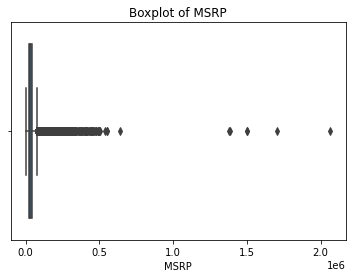

In [15]:
sns.boxplot(x='MSRP',data=df)
plt.title("Boxplot of MSRP")
plt.show()


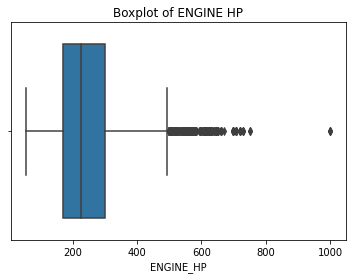

In [16]:
sns.boxplot(x='ENGINE_HP',data=df)
plt.title("Boxplot of ENGINE HP")
plt.show()


In [17]:
df.loc[0]

MAKE                             BMW
MODEL                     1 Series M
YEAR                            2011
ENGINE_HP                      335.0
ENGINE_CYLINDERS                 6.0
TRANS_TYPE                    MANUAL
DRIVEN_WHEELS       rear wheel drive
H_MPG                             26
C_MPG                             19
MSRP                           46135
Name: 0, dtype: object

In [21]:
l=['YEAR','ENGINE_HP','ENGINE_CYLINDERS','H_MPG','C_MPG','MSRP']

In [22]:
Q1=np.percentile(df['MSRP'],25)
Q1

20990.0

In [23]:
Q3=np.percentile(df['MSRP'],75)
Q3

42205.0

In [24]:
IQR = Q3 - Q1
IQR

21215.0

In [25]:
low = Q1-1.5*IQR
upp = Q3+1.5*IQR

In [26]:
low,upp

(-10832.5, 74027.5)

In [27]:
outliers=[]
for i in df['MSRP']:
  if((i>upp)or(i<low)):
    outliers.append(i)

In [28]:
for i in df['MSRP']:
  if i not in outliers:
    df2=i

Distplor of Engine HP

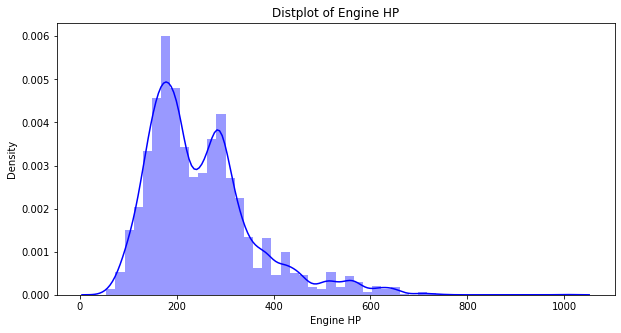

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df['ENGINE_HP'],color='blue')
plt.title("Distplot of Engine HP")
plt.xlabel('Engine HP')
plt.ylabel('Density')
plt.show()

plot all the columns present in list l together using subplot of dimention (2,3).

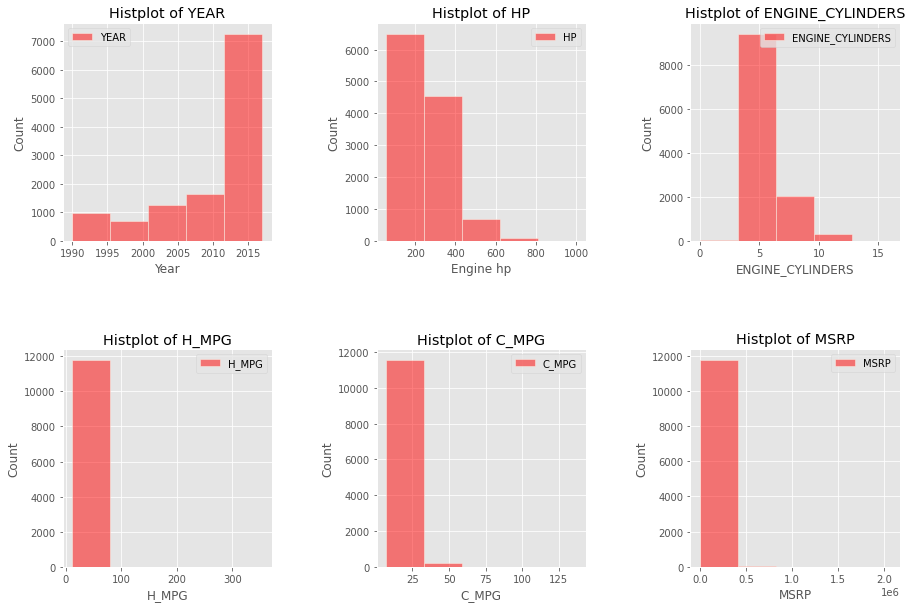

In [51]:
import matplotlib.style as style
style.use('ggplot')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x='YEAR',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of YEAR")
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['YEAR'],loc=2)


plt.subplot(2,3,2)
sns.histplot(data=df,x='ENGINE_HP',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of HP")
plt.xlabel('Engine hp')
plt.ylabel('Count')
plt.legend(['HP'],loc=1)


plt.subplot(2,3,3)
sns.histplot(data=df,x='ENGINE_CYLINDERS',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of ENGINE_CYLINDERS")
plt.xlabel('ENGINE_CYLINDERS')
plt.ylabel('Count')
plt.legend(['ENGINE_CYLINDERS'],loc=1)


plt.subplot(2,3,4)
sns.histplot(data=df,x='H_MPG',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of H_MPG")
plt.xlabel('H_MPG')
plt.ylabel('Count')
plt.legend(['H_MPG'],loc=1)

plt.subplot(2,3,5)
sns.histplot(data=df,x='C_MPG',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of C_MPG")
plt.xlabel('C_MPG')
plt.ylabel('Count')
plt.legend(['C_MPG'],loc=1)


plt.subplot(2,3,6)
sns.histplot(data=df,x='MSRP',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histplot of MSRP")
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.legend(['MSRP'],loc=1)

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()


Plot a countplot for a variable Transmission vertically with hue as Drive mode

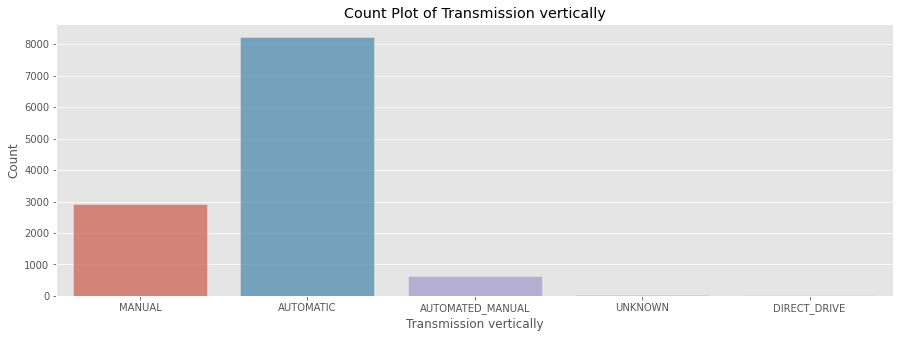

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='TRANS_TYPE',edgecolor='linen',alpha=0.7)
plt.title("Count Plot of Transmission vertically")
plt.xlabel('Transmission vertically')
plt.ylabel('Count')

plt.show()

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 

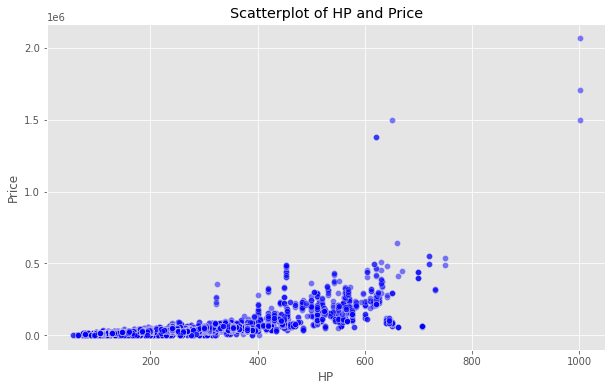

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='ENGINE_HP',y='MSRP',color='blue',edgecolor='linen',alpha=0.5)
plt.title("Scatterplot of HP and Price")
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

Barplot of Cylinder and Price

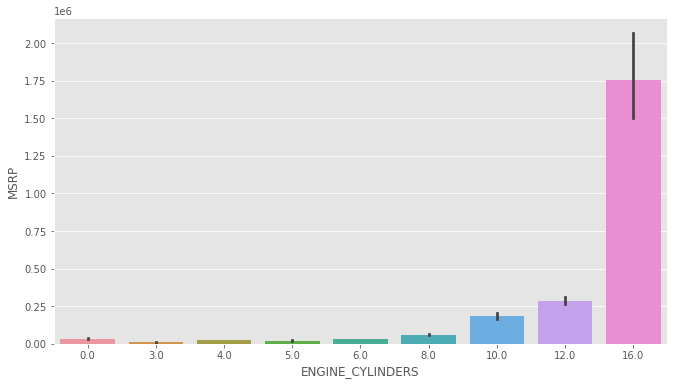

In [65]:
plt.figure(figsize=(11,6))
sns.barplot(data=df,x='ENGINE_CYLINDERS',y='MSRP')

Count Plot of Transmission

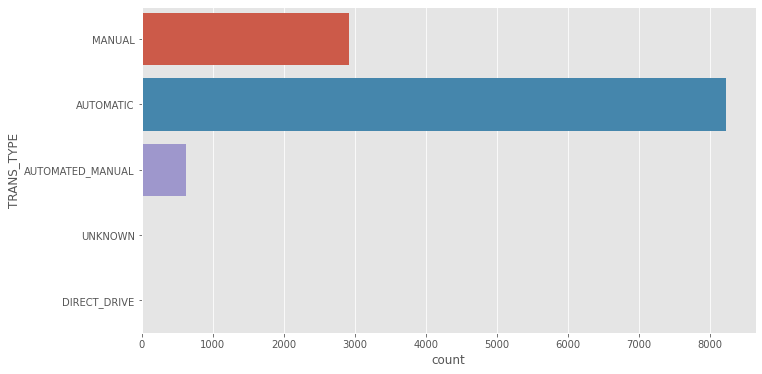

In [71]:
plt.figure(figsize=(11,6))
sns.countplot(data=df,y='TRANS_TYPE')

Heat map of the DataSet

In [75]:
df1=df.drop(columns=['MAKE','MODEL','TRANS_TYPE','DRIVEN_WHEELS'],axis=1)
df1.head()

,YEAR,ENGINE_HP,ENGINE_CYLINDERS,H_MPG,C_MPG,MSRP
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


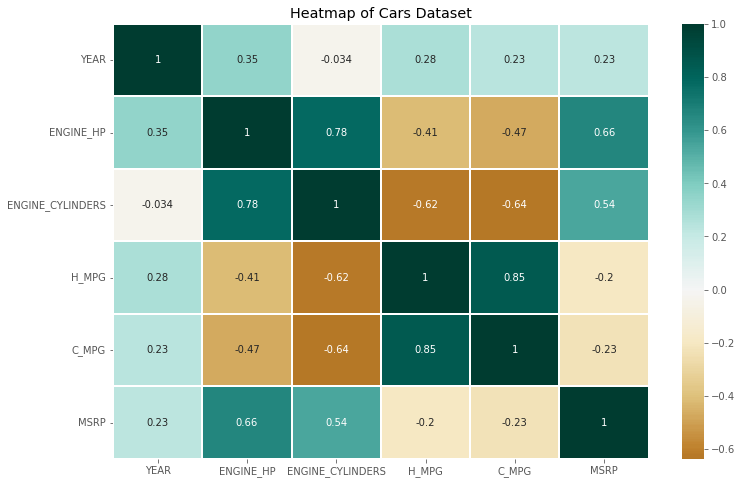

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,linewidth=1,cmap='BrBG',center=0)
plt.title("Heatmap of Cars Dataset")
plt.show()